# Proposal: Bitcoin, The New Gold
Bill Henderson

CSCI-E-83

# Introduction
As Marion Laboure, senior economist and market strategist at Deutsche Bank mentions in her video about Bitcoin (Laboure 2024), mankind has always sought assets to store wealth in combination with normal financial instruments that governments use for commerce. The longest lasting and best known of these long term assets is gold. As Bitcoin (BTC) matures and loses some of its new and eccentric flavor, some desirable qualities emerge like fixed supply, ease of trade, and value. These emerging qualities have got financial minded people thinking, could BTC be the next gold?

# Project Goals
This project will endeavour to show that BTC is currently performing similarly to gold and could be seen as a replacement for gold in its reaction to market stimulus. This will be analyzed by collecting eight different BTC exchange datasets from Kaggle (Bukhari 2024) to better understand the response of BTC markets and compare those responses to the Gold market data from Novandra's Kaggle dataset (Novandra 2024). Both of these datasets show values in US Dollars (USD).

# Data
The project consist of two datasets: The BTC data (Bukhari 2024) and the gold dataset (Novandra 2024).

The BTC dataset is eight csv files at a time resolution of one minute records. Seven of these eight csv file are each different exchanges: Binance, Bitfinex, BitMEX, Bitstamp, Coinbase, KuCoin, and OKX. The last csv file is Combined_Index, which is an averaged collection of all the datasets to show a continuous, unbroken BTC dataset, with no gaps and no erroneous values, giving a more comprehensive view of the market (Bukhari 2024). The columns in each data set are the standard financial metrics Open, High, Low, Close, and Volume (OHLCV). Number of trades and taker volumes are also included when available.

The Gold dataset is multiple time resolution csv datasets ranging from five minutes to one month. All the datasets start on June 11, 2004 through September 20, 2024. The columns are USD based values for OHLCV metrics, much like the BTC datasets. The gold set only has the OHLCV values and doesn't have any of the volume or trade info that the BTC datasets have. The BTC datasets have varying start and stop dates for each dataset, so the maximum start date and minimum end date will be used to ensure we have as much intersecting data between the datasets as possible.

The datasets will need some clean up for use. As the data timeframes don't line up, I'll have to exclude the times that don't intersect. Also, the BTC data doesn't line up resolution wise, so the BTC data will have to be aggregated to match the resolution chosen for the gold dataset. This aggregation will be done per column by each column's specific meaning: Open will be the first Open value in the aggregation, High will be the maximum value, Low will be the minimum value, Close will be the last, and Volume will be a sum of values. Since the intent of the project is to understand long term trends and similarity, I think a single day resolution for the datasets is the best mix of detail and aggregation.

# Exploratory Data Analysis

## Lining Up Dates
The first part of our Exploratory Data Analysis (EDA) after ingesting the data is lining up our date information. The Gold data set starts in 2004 and continues through September of 2024, so it's the most accomidating of all the datasets. BTC hasn't been around that long so those datasets will be much shorter.

After inspecting the data, one exchange has already proven unacceptable for our analysis. Bitstamp's earliest data is from November 2024, which is after our final gold data point and far to little data, even if we could accomodate it with the gold dataset. Since we have 6 other data sets and the Index set, I think dropping Bitstamp is our best choice.

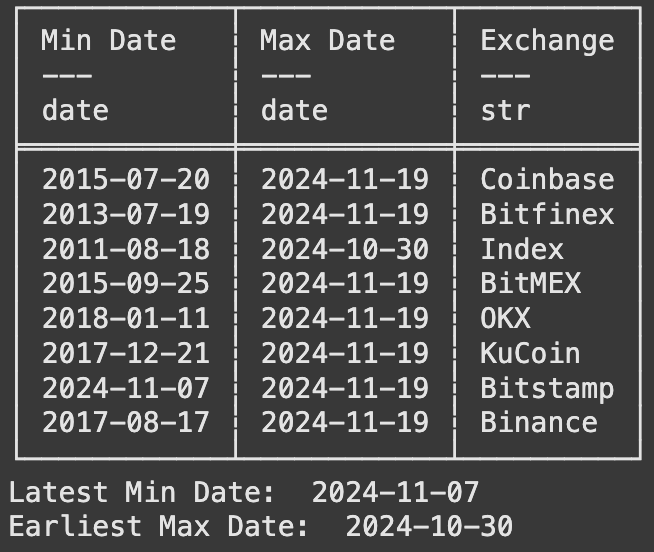

A near six year window is a far better result for our data timeframe, even having to restrict our Max Date to September.

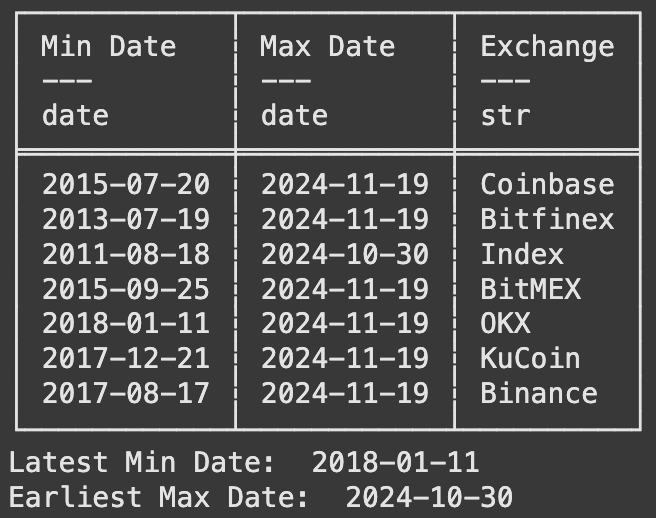

# Modeling Methods

# Appendix

## Bibliography

Laboure, Marion (2024). Bitcoin could potentially become the 21st century gold. [online] Available at: https://www.db.com/what-next/digital-disruption/dossier-payments/i-could-potentially-see-bitcoin-to-become-the-21st-century-gold.

Novandra Anugrah (2024). XAU/USD Gold Price Historical Data (2004-2024). [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/novandraanugrah/xauusd-gold-price-historical-data-2004-2024.

Bukhari, I. (2024). Bitcoin BTC, 7 Exchanges, 1m Full Historical Data. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/imranbukhari/comprehensive-btcusd-1m-data [Accessed 19 Nov. 2024].

‌

## Code

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
# module imports
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import kagglehub
import os
from itertools import combinations

In [141]:
# Download latest version
data_dict = {
    "btc": kagglehub.dataset_download("imranbukhari/comprehensive-btcusd-1m-data"),
    "gold": kagglehub.dataset_download("novandraanugrah/xauusd-gold-price-historical-data-2004-2024")
}

files = {}
for k, p in data_dict.items():
    files[k] = [ x[2] for x in os.walk(p)][0]
    print(f"{k} files: {files[k]}")

btc files: ['BTCUSD_1m_Coinbase.csv', 'BTCUSD_1m_Bitfinex.csv', 'BTCUSD_1m_Combined_Index.csv', 'BTCUSD_1m_BitMEX.csv', 'BTCUSD_1m_OKX.csv', 'BTCUSD_1m_KuCoin.csv', 'BTCUSD_1m_Bitstamp.csv', 'BTCUSD_1m_Binance.csv']
gold files: ['XAU_4h_data_2004_to_2024-09-20.csv', 'XAU_5m_data_2004_to_2024-09-20.csv', 'XAU_1Month_data_2004_to_2024-09-20.csv', 'XAU_30m_data_2004_to_2024-09-20.csv', 'XAU_15m_data_2004_to_2024-20-09.csv', 'XAU_1w_data_2004_to_2024-09-20.csv', 'XAU_1h_data_2004_to_2024-09-20.csv', 'XAU_1d_data_2004_to_2024-09-20.csv']


In [142]:
# Fetching Gold Data
gold_pl = pl.read_csv(data_dict['gold'] + '/XAU_1d_data_2004_to_2024-09-20.csv')
gold_pl.head()

Date,Time,Open,High,Low,Close,Volume
str,str,f64,f64,f64,f64,i64
"""2004.06.11""","""00:00""",384.0,384.8,382.8,384.1,272
"""2004.06.14""","""00:00""",384.3,385.8,381.8,382.8,1902
"""2004.06.15""","""00:00""",382.8,388.8,381.1,388.6,1951
"""2004.06.16""","""00:00""",387.1,389.8,382.6,383.8,2014
"""2004.06.17""","""00:00""",383.6,389.3,383.0,387.6,1568


In [143]:
gold_pl.describe()

statistic,Date,Time,Open,High,Low,Close,Volume
str,str,str,f64,f64,f64,f64,f64
"""count""","""5205""","""5205""",5205.0,5205.0,5205.0,5205.0,5205.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,1296.651641,1306.106361,1286.952941,1296.810334,75722.276465
"""std""",null,null,472.282414,475.206898,469.35262,472.383844,64797.308192
"""min""","""2004.06.11""","""00:00""",382.8,384.8,381.1,382.8,2.0
"""25%""",null,null,963.17,975.8,953.09,962.83,22297.0
"""50%""",null,null,1284.83,1291.93,1277.81,1284.95,69922.0
"""75%""",null,null,1677.93,1692.78,1663.22,1677.61,110485.0
"""max""","""2024.09.19""","""00:00""",2592.2,2593.39,2591.51,2592.29,679039.0


In [144]:
# Cleaning gold data
gold_pl = gold_pl.with_columns(
    pl.col('Date').str.to_date()
).drop('Time')

gold_pl.describe()

statistic,Date,Open,High,Low,Close,Volume
str,str,f64,f64,f64,f64,f64
"""count""","""5205""",5205.0,5205.0,5205.0,5205.0,5205.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""","""2014-08-11 10:00:20.749000""",1296.651641,1306.106361,1286.952941,1296.810334,75722.276465
"""std""",null,472.282414,475.206898,469.35262,472.383844,64797.308192
"""min""","""2004-06-11""",382.8,384.8,381.1,382.8,2.0
"""25%""","""2009-07-23""",963.17,975.8,953.09,962.83,22297.0
"""50%""","""2014-08-15""",1284.83,1291.93,1277.81,1284.95,69922.0
"""75%""","""2019-09-02""",1677.93,1692.78,1663.22,1677.61,110485.0
"""max""","""2024-09-19""",2592.2,2593.39,2591.51,2592.29,679039.0


In [145]:
# collecting BTC Data
btc_pl = {}
for fname in files['btc']:
    exchange = fname.split('.')[0].split('_')[-1]
    btc_pl[exchange] = pl.read_csv(data_dict['btc'] + '/' + fname)
    print(exchange)
    print(btc_pl[exchange].head())


Coinbase
shape: (5, 6)
┌─────────────────────┬────────┬────────┬────────┬────────┬──────────┐
│ Open time           ┆ Low    ┆ High   ┆ Open   ┆ Close  ┆ Volume   │
│ ---                 ┆ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---      │
│ str                 ┆ f64    ┆ f64    ┆ f64    ┆ f64    ┆ f64      │
╞═════════════════════╪════════╪════════╪════════╪════════╪══════════╡
│ 2015-07-20 21:37:00 ┆ 277.97 ┆ 277.98 ┆ 277.98 ┆ 277.97 ┆ 0.7913   │
│ 2015-07-20 21:38:00 ┆ 277.98 ┆ 277.99 ┆ 277.98 ┆ 277.99 ┆ 0.5606   │
│ 2015-07-20 21:39:00 ┆ 277.97 ┆ 277.97 ┆ 277.97 ┆ 277.97 ┆ 0.1496   │
│ 2015-07-20 21:40:00 ┆ 277.98 ┆ 277.99 ┆ 277.98 ┆ 277.99 ┆ 1.2168   │
│ 2015-07-20 21:41:00 ┆ 277.99 ┆ 277.99 ┆ 277.99 ┆ 277.99 ┆ 2.704924 │
└─────────────────────┴────────┴────────┴────────┴────────┴──────────┘
Bitfinex
shape: (5, 6)
┌─────────────────────┬───────┬───────┬───────┬───────┬──────────┐
│ Open time           ┆ Open  ┆ Close ┆ High  ┆ Low   ┆ Volume   │
│ ---                 ┆ ---   ┆ ---   ┆

In [146]:
# Convert BTC time to Date and group data
for k, v in btc_pl.items():
    v = v.with_columns(
        pl.col('Open time').str.to_datetime().alias('Datetime')
    )
    v = v.group_by_dynamic('Datetime',every='1d').agg(
            pl.col('Open').first().round(2).alias('Open'),
            pl.col('High').max().round(2).alias('High'),
            pl.col('Low').min().round(2).alias('Low'),
            pl.col('Close').last().round(2).alias('Close'),
            pl.col('Volume').sum().round(2).alias('Volume')
        )

    v = v.with_columns(
        pl.col('Datetime').dt.date().alias('Date')
    ).drop('Datetime')

    btc_pl[k] = v
    desc = v.describe()
    print(k)
    print(
        desc.select(
            pl.col(pl.Float64).round(2)
            ).describe()
        )
    btc_pl[k] = v

Coinbase
shape: (9, 6)
┌────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ statistic  ┆ Open         ┆ High         ┆ Low          ┆ Close        ┆ Volume       │
│ ---        ┆ ---          ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│ str        ┆ f64          ┆ f64          ┆ f64          ┆ f64          ┆ f64          │
╞════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ count      ┆ 9.0          ┆ 9.0          ┆ 9.0          ┆ 9.0          ┆ 9.0          │
│ null_count ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          │
│ mean       ┆ 20380.891111 ┆ 20929.917778 ┆ 19947.446667 ┆ 20603.603333 ┆ 25805.481111 │
│ std        ┆ 28836.487612 ┆ 29634.425052 ┆ 28593.348657 ┆ 29421.168017 ┆ 52772.622753 │
│ min        ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          ┆ 0.0          │
│ 25%        ┆ 3411.0       ┆ 3411.0       ┆ 3411.0       ┆ 3411.0       ┆ 34

In [147]:
# Find min and max dates for each exchange
min_max_dates = pl.DataFrame()
for k, v in btc_pl.items():
    min_max = v.select(
        pl.col('Date').min().alias("Min Date"),
        pl.col('Date').max().alias("Max Date")
    ).with_columns(pl.lit(k).alias('Exchange'))
    min_max_dates = pl.concat([min_max_dates, min_max], how='vertical')
print(min_max_dates)
print("Latest Min Date: ", min_max_dates['Min Date'].max())
print("Earliest Max Date: ", min_max_dates['Max Date'].min())


shape: (8, 3)
┌────────────┬────────────┬──────────┐
│ Min Date   ┆ Max Date   ┆ Exchange │
│ ---        ┆ ---        ┆ ---      │
│ date       ┆ date       ┆ str      │
╞════════════╪════════════╪══════════╡
│ 2015-07-20 ┆ 2024-11-19 ┆ Coinbase │
│ 2013-07-19 ┆ 2024-11-19 ┆ Bitfinex │
│ 2011-08-18 ┆ 2024-10-30 ┆ Index    │
│ 2015-09-25 ┆ 2024-11-19 ┆ BitMEX   │
│ 2018-01-11 ┆ 2024-11-19 ┆ OKX      │
│ 2017-12-21 ┆ 2024-11-19 ┆ KuCoin   │
│ 2024-11-07 ┆ 2024-11-19 ┆ Bitstamp │
│ 2017-08-17 ┆ 2024-11-19 ┆ Binance  │
└────────────┴────────────┴──────────┘
Latest Min Date:  2024-11-07
Earliest Max Date:  2024-10-30


In [148]:
useable_min_max_dates = min_max_dates.filter(
    pl.col('Exchange') != 'Bitstamp')
print(useable_min_max_dates)
print("Latest Min Date: ", useable_min_max_dates['Min Date'].max())
print("Earliest Max Date: ", useable_min_max_dates['Max Date'].min())

shape: (7, 3)
┌────────────┬────────────┬──────────┐
│ Min Date   ┆ Max Date   ┆ Exchange │
│ ---        ┆ ---        ┆ ---      │
│ date       ┆ date       ┆ str      │
╞════════════╪════════════╪══════════╡
│ 2015-07-20 ┆ 2024-11-19 ┆ Coinbase │
│ 2013-07-19 ┆ 2024-11-19 ┆ Bitfinex │
│ 2011-08-18 ┆ 2024-10-30 ┆ Index    │
│ 2015-09-25 ┆ 2024-11-19 ┆ BitMEX   │
│ 2018-01-11 ┆ 2024-11-19 ┆ OKX      │
│ 2017-12-21 ┆ 2024-11-19 ┆ KuCoin   │
│ 2017-08-17 ┆ 2024-11-19 ┆ Binance  │
└────────────┴────────────┴──────────┘
Latest Min Date:  2018-01-11
Earliest Max Date:  2024-10-30


In [149]:
# Date Limiting Datasets Per Findings
min_date = useable_min_max_dates['Min Date'].max()
max_date = gold_pl['Date'].max()
print("Min Date: ", min_date)
print("Max Date: ", max_date)

gold_pl_ltd = gold_pl.filter(
    (pl.col('Date') >= min_date) & (pl.col('Date') <= max_date)
)
print("Gold Shape: ", gold_pl_ltd.shape)

btc_pl_ltd = {}
for k, d in btc_pl.items():
    if k == 'Bitstamp':
        continue
    btc_pl_ltd[k] = d.filter(
        (pl.col('Date') >= min_date) & (pl.col('Date') <= max_date)
    )
    print(f"{k} Shape: ", btc_pl_ltd[k].shape)

Min Date:  2018-01-11
Max Date:  2024-09-19
Gold Shape:  (1725, 6)
Coinbase Shape:  (2444, 6)
Bitfinex Shape:  (2444, 6)
Index Shape:  (2444, 6)
BitMEX Shape:  (2444, 6)
OKX Shape:  (2444, 6)
KuCoin Shape:  (2444, 6)
Binance Shape:  (2444, 6)


In [156]:
# Check if date lists are the same
for a, b in combinations(btc_pl_ltd.keys(), 2):
    print(f"Dates Equal {a} to {b}: ", btc_pl_ltd[a]['Date'].equals(btc_pl_ltd[b]['Date']))

print("\nMissing Date Count in Gold Dataset: ", len(set(btc_pl_ltd['Index']['Date']) - set(gold_pl_ltd['Date'])))

Dates Equal Coinbase to Bitfinex:  True
Dates Equal Coinbase to Index:  True
Dates Equal Coinbase to BitMEX:  True
Dates Equal Coinbase to OKX:  True
Dates Equal Coinbase to KuCoin:  True
Dates Equal Coinbase to Binance:  True
Dates Equal Bitfinex to Index:  True
Dates Equal Bitfinex to BitMEX:  True
Dates Equal Bitfinex to OKX:  True
Dates Equal Bitfinex to KuCoin:  True
Dates Equal Bitfinex to Binance:  True
Dates Equal Index to BitMEX:  True
Dates Equal Index to OKX:  True
Dates Equal Index to KuCoin:  True
Dates Equal Index to Binance:  True
Dates Equal BitMEX to OKX:  True
Dates Equal BitMEX to KuCoin:  True
Dates Equal BitMEX to Binance:  True
Dates Equal OKX to KuCoin:  True
Dates Equal OKX to Binance:  True
Dates Equal KuCoin to Binance:  True

Missing Date Count in Gold Dataset:  719
